In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


In [3]:
# Encode 'gender' as a binary variable (0 = male, 1 = female)
titanic_data['gender'] = titanic_data['gender'].map({'male': 0, 'female': 1})

# Encode 'survived' as a binary variable (0 = no, 1 = yes)
titanic_data['survived'] = titanic_data['survived'].map({'no': 0, 'yes': 1})

# One-hot encode the 'embarked' column
titanic_data = pd.get_dummies(titanic_data, columns=['embarked'], drop_first=True)

# Encode 'class' as ordinal (1st = 1, 2nd = 2, 3rd = 3)
titanic_data['class'] = titanic_data['class'].map({'1st': 1, '2nd': 2, '3rd': 3})

# Display the first few rows of the modified dataset
titanic_data.head()

,name,gender,age,class,country,ticketno,fare,sibsp,parch,survived,embarked_C,embarked_Q,embarked_S
0,"Abbing, Mr. Anthony",0,42.0,3.0,United States,5547.0,7.11,0.0,0.0,0,False,False,True
1,"Abbott, Mr. Eugene Joseph",0,13.0,3.0,United States,2673.0,20.05,0.0,2.0,0,False,False,True
2,"Abbott, Mr. Rossmore Edward",0,16.0,3.0,United States,2673.0,20.05,1.0,1.0,0,False,False,True
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",1,39.0,3.0,England,2673.0,20.05,1.0,1.0,1,False,False,True
4,"Abelseth, Miss. Karen Marie",1,16.0,3.0,Norway,348125.0,7.13,0.0,0.0,1,False,False,True


In [4]:
# Select features for the model
X = titanic_data[['class', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S']].copy()
y = titanic_data['survived']

# Impute missing values in 'age' and 'fare' with the median
imputer = SimpleImputer(strategy='median')
X.loc[:, 'age'] = imputer.fit_transform(X[['age']])
X.loc[:, 'fare'] = imputer.fit_transform(X[['fare']])

# Scale the 'age' and 'fare' columns
scaler = StandardScaler()
X.loc[:, ['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])

# Handle missing values
X.loc[:, :] = X.fillna(X.mean())

In [5]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_val)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7647058823529411
Confusion Matrix:
[[269  35]
 [ 69  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       304
           1       0.66      0.50      0.57       138

    accuracy                           0.76       442
   macro avg       0.73      0.69      0.70       442
weighted avg       0.75      0.76      0.75       442



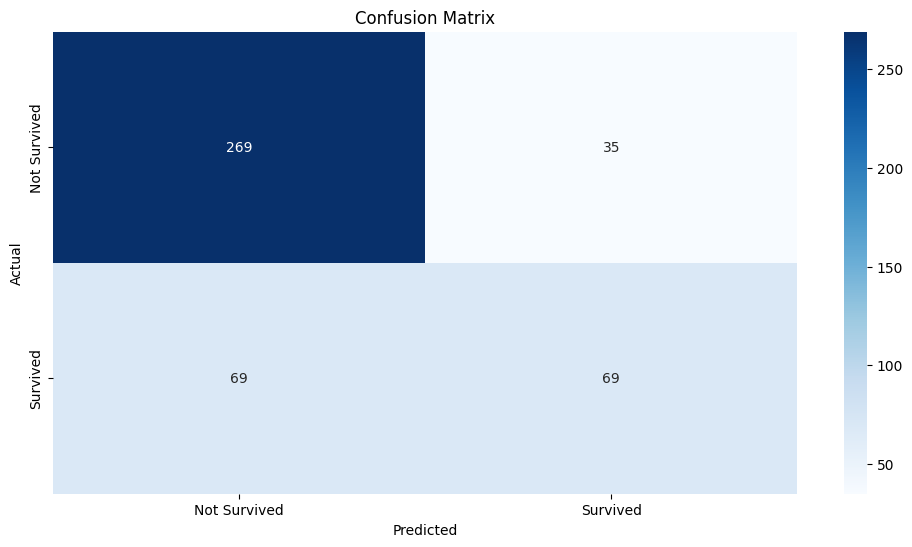

In [10]:
# Confusion Matrix
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# SUMMARY 

# Logistic Regression: 
# This model estimates the probability of a passenger surviving based on various features such as passenger class, gender, age, and fare.

# Classification Report: 
# It provides precision, recall, and F1-score metrics for each class (survived and not survived).

# Accuracy: 
# The percentage of correct predictions made by the model.

# Confusion Matrix: 
# Shows the number of true positive, true negative, false positive, and false negative predictions. 
# This helps to better understand the performance of the model.